Let's look at the Iris dataset using some common ML (machine learning) algorithms.
We'll select some data for training and use the remainder for validation.
This notebook is entirely cribbed from an article by Dr. Jason Brownlee: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/. His web site is a great way to get started in ML.

In [1]:
# Load libraries
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Use scikit-learn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('bezdekIris_copy.data')

In [3]:
dataset.describe()    # pandas summary of the data statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We saw some of these graphs in the previous Pnadas notebook. Here is a familiar histogram display of the Iris measurement parameters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCE40F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEAC358>]], dtype=object)

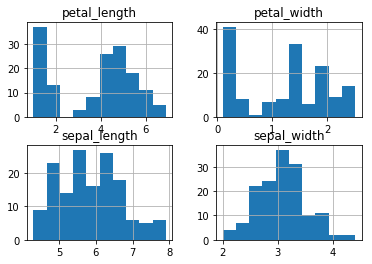

In [5]:
dataset.hist()

Box and Whisker plots show us the distribution of each parameter in a different fashion. There is more info than in the histogram.

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

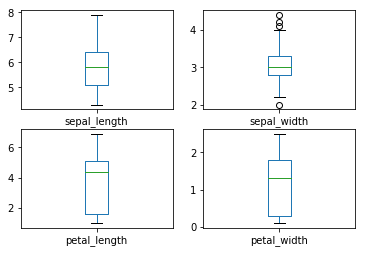

In [6]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

Onward to ML.
We need to extract some of the data for a training set. The ML algorithms will develop their prediction parameters using the training set. Another fraction of the dataset is reserved for validation of the parameters - how well is the validation data predicted? The split is 80% for training, 20% for validation.
If we have time we will now go to New Hampshire where this data was obtained in the 1930s and look for irises to create our own dataset and have the algorithms identify the flowers we have seen.

In [7]:
array = dataset.values    # the header row is not part of values
X = array[:,0:4]   # the numbers
Y = array[:,4]     # the species names
validation_size = 0.20
seed = 7
# Break up the dataset randomly. 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Do you think there might be a problem with the random dataset extraction?
Maybe. We know there are 50 samples of each species in the input.
Should we require 40 samples of each species in the training set?

scikit-learn has functions to create a test harness and run a number of ML algorithms so that we can evaluate which ones are best for this data. The article that I cribbed from says that we'll use "10-fold cross validation" and score by accuracy (other scores are possible). 'Accuracy' is the number of correct predictions divided by total number of samples.

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

I'm not going to explain these algorithms, I didn't choose them.

In [8]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


The spot check doesn't make use of the validation data, it only uses the training data.
We can evaluate accuracy on the validation set, but that comes later.
We use accuracy to decide which algorithm(s) are best for this dataset.

The results indicate that SVM and KNN are most accurate. You might get different results, since these are measures of 10 runs of each algorithm.
Look at a summary of these runs:

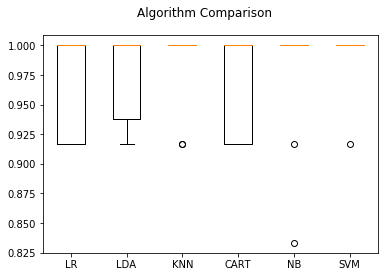

In [9]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Finally we make predictions using the validation dataset. Validation is 20% of the input, there are 150 samples, so we are only using 30 samples for validation. Keep that in mind when we see the number of hits and misses.

In [10]:
# Use SVM to make predictions.
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



K-nearest neighbors makes sense for this dataset. Refer back to the scatter plots and you can perceive that the samples clump. Look at the color-coded scatter plots in my previous Pandas notebook and it's clear that the samples for each species cluster together.

In [11]:
# Use KNN to make predictions. Note how simple it is to use sklearn.
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

